In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

Read data

In [3]:
df = pd.read_csv(r'C:\Users\ankit\Downloads\Reliance.csv', index_col='Date',parse_dates=True)

Plot Your Data

In [4]:
df=df.dropna()

In [5]:
df

,Price
Date,
2016-03-01,491.125000
2016-04-01,516.825012
2016-05-02,493.149994
2016-06-01,476.649994
2016-07-01,486.825012
2016-08-01,504.649994
2016-09-01,514.575012
2016-10-03,545.200012
2016-11-01,524.150024


In [6]:
print('Shape of Data',df.shape)

Shape of Data (60, 1)


In [7]:
df.head()

,Price
Date,
2016-03-01,491.125000
2016-04-01,516.825012
2016-05-02,493.149994
2016-06-01,476.649994
2016-07-01,486.825012


<AxesSubplot:xlabel='Date'>

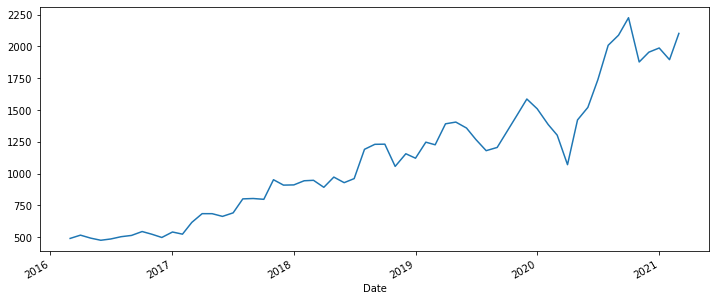

In [8]:
df['Price'].plot(figsize=(12,5))

Check For Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF :", dftest[0])
  print("2. P-Value :", dftest[1])
  print("3. Num of Lags :", dftest[2])
  print("4. Num of Observation Used for ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
    print("\t",key, ": ", val)


In [10]:
ad_test(df['Price'])

1. ADF : 1.3127433090608107
2. P-Value : 0.9966793420977567
3. Num of Lags : 6
4. Num of Observation Used for ADF Regression and Critical Values Calculation : 53
5. Critical Values :
	 1% :  -3.560242358792829
	 5% :  -2.9178502070837
	 10% :  -2.5967964150943397


Figure Out Order for ARIMA Model

In [11]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit = auto_arima(df['Price'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=736.768, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=733.227, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=735.210, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=735.211, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=734.361, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=737.152, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.339 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -364.613
Date:                Sat, 29 May 2021   AIC                            733.227
Time:                        16:15:01   BIC                            737.382
Sample:                             0   HQIC                           734.849
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     27.2979     15.214      1.794      0.073      -2.521      57.117
sigma2      1.366e+04   1896.279      7.201      0.000    9938.829    1.74e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.65
Prob(Q):                              0.90   Prob(JB):                         0.06
Heteroskedasticity (H):              13.22   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima_model import ARIMA

Split Data into Training and Testing

In [14]:
print(df.shape)
train=df.iloc[:-4]
test=df.iloc[-4:]
print(train.shape,test.shape)

(60, 1)
(56, 1) (4, 1)


Train the Model

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Price'],order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                   55
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -340.099
Method:                           css   S.D. of innovations            117.294
Date:                Sat, 29 May 2021   AIC                            684.199
Time:                        16:15:14   BIC                            688.213
Sample:                             1   HQIC                           685.751
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2032     15.816      1.594      0.111      -5.796      56.202
==============================================================================
"""

Make Prediction on Test Set

In [16]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

Date
2020-12-01    1902.503232
2021-01-01    1927.706414
2021-02-01    1952.909597
2021-03-01    1978.112780
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Date'>

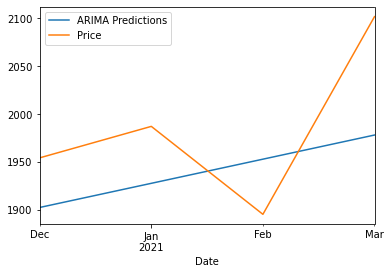

In [17]:
pred.plot(legend=True)
test['Price'].plot(legend=True)

In [18]:
test['Price'].mean()

1984.625

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Price']))
print(rmse)

78.74539964678667


In [20]:
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mape=sqrt(mean_absolute_percentage_error(pred,test['Price']))
print(mape)

0.1936576529102209


In [21]:
model2=ARIMA(df['Price'],order=(0,1,0))
model2=model2.fit()
df.tail()

,Price
Date,
2020-11-02,1877.300049
2020-12-01,1954.300049
2021-01-01,1987.150024
2021-02-01,1895.349976
2021-03-01,2101.699951


For Future Dates

In [22]:
#index_future_dates=pd.date_range(start='2021-22',end='2023-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+2,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#print.index=index_future_dates
print(pred)

59    2128.997832
60    2156.295712
61    2183.593593
Name: ARIMA Predictions, dtype: float64
